In [1]:
#Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

In [ ]:
"""The Adult Income dataset (also known as the Census Income dataset) is a classic dataset used for binary classification tasks. 
The goal is to predict whether an individual's income is above or below $50,000 based on various features such as age, education, occupation, etc."""

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [3]:
# Load the Adult Income dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
        'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
        'hours_per_week', 'native_country', 'income']
df = pd.read_csv(url, names=cols, header=None)

In [6]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.isna().sum()

age                                0
fnlwgt                             0
education_num                      0
capital_gain                       0
capital_loss                       0
                                  ..
native_country_ Thailand           0
native_country_ Trinadad&Tobago    0
native_country_ United-States      0
native_country_ Vietnam            0
native_country_ Yugoslavia         0
Length: 105, dtype: int64

In [4]:

# Handle missing values
df = df.replace(' ?', np.nan)
df = df.dropna()

In [5]:
# Encode categorical variables
encoder = LabelEncoder()
df['income'] = encoder.fit_transform(df['income'])
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

In [16]:
# Calculate the correlation matrix
corr_matrix = df.corr()

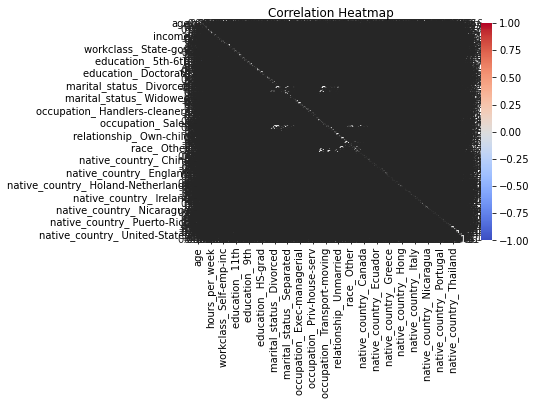

In [17]:
# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [8]:
# Split the data into training and test sets
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [12]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)


In [13]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


In [14]:
print("Confusion Matrix:")
print(conf_matrix)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


Confusion Matrix:
[[4194  338]
 [ 606  895]]
Accuracy: 0.8435272666998177
F1 Score: 0.6547183613752744
Recall: 0.5962691538974018
Precision: 0.7258718572587186


Text(0.5, 1.0, 'Confusion Matrix')

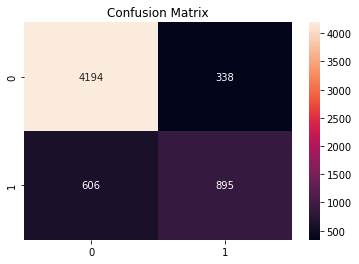

In [15]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")

In [ ]:
"""The solution trains a Logistic Regression model on the Adult Income dataset. 
The dataset is first preprocessed to handle missing values and encode categorical variables. 
Then, the data is split into training and test sets, and normalized using MinMaxScaler.
The Logistic Regression model is trained on the training data and evaluated on the test data.
 Evaluation metrics such as confusion matrix, accuracy, F1 score, recall, and precision are calculated and printed.
Finally, a heatmap of the confusion matrix is plotted to visualize the performance of the model."""